# Continuous Probabilistic Methods 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
def get_fences(df, col, k=1.5):
    '''
    This function takes in DataFrame name, a column name as a string
    literal, and a k value. The function will calculate the inter-quartile
    range(IQR). The inter-quartile range is the middle 50% of observations
    bounded by Q1 at the bottom and Q3 at the top. It will then return a 
    lower bound that is k * IQR below Q1 and an upper bound that 
    is k * IQR above Q3.
    
    Arguments: df (a Pandas DataFrame), col (a Pandas Series), k (a multiplier)
    Returns: lower_bound, upper_bound
    '''
    q1 = df[col].quantile(.25)
    q3 = df[col].quantile(.75)
    iqr = q3 - q1
    lower_bound = q1 - (iqr * k)
    upper_bound = q3 + (iqr * k)
    
    return lower_bound, upper_bound

In [3]:
df = pd.read_csv('lemonade.csv')
df

,Date,Day,Temperature,Rainfall,Flyers,Price,Sales
0,1/1/17,Sunday,27.0,2.00,15,0.5,10
1,1/2/17,Monday,28.9,1.33,15,0.5,13
2,1/3/17,Tuesday,34.5,1.33,27,0.5,15
3,1/4/17,Wednesday,44.1,1.05,28,0.5,17
4,1/5/17,Thursday,42.4,1.00,33,0.5,18
...,...,...,...,...,...,...,...
360,12/27/17,Wednesday,42.7,1.00,33,0.5,19
361,12/28/17,Thursday,37.8,1.25,32,0.5,16
362,12/29/17,Friday,39.5,1.25,17,0.5,15
363,12/30/17,Saturday,30.9,1.43,22,0.5,13


In [4]:
# make names pythonic
df.columns = df.columns.str.lower()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         365 non-null    object 
 1   day          365 non-null    object 
 2   temperature  365 non-null    float64
 3   rainfall     365 non-null    float64
 4   flyers       365 non-null    int64  
 5   price        365 non-null    float64
 6   sales        365 non-null    int64  
dtypes: float64(3), int64(2), object(2)
memory usage: 20.1+ KB


In [6]:
# num_cols = [col for col in df if pd.api.types.is_numeric_dtype(df[col])]
# num_cols

In [7]:
def make_fence_dict(df, k=1.5):
    '''
    This function uses the get_fences() function to create a dictionary
    of fences for numeric columns in a DataFrame.
    
    Arguments: DataFrame
    Returns: Dictionary of fence boundaries for each numeric column.
    '''
    my_fences = {}
    num_cols = [col for col in df if pd.api.types.is_numeric_dtype(df[col])]
    for col in num_cols:
        my_fences[col] = get_fences(df, col, k)
        
    return my_fences

In [8]:
# my_fences = make_fence_dict(df)
# my_fences

### 1. Using lemonade.csv dataset and focusing on continuous variables:



#### Use the IQR Range Rule and the upper and lower bounds to identify the lower outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these lower outliers make sense? Which outliers should be kept?
 

In [9]:
def get_upper_outliers(df, k=1.5):
    '''
    Function prints upper outliers for each numeric column.
    
    Arguments:  df: A pandas dataframe.
                k: multiplier of IQR for fence.
        
    Returns: Nothing. Prints upper outlier rows by feature.
    '''
    # filter columns to numeric dtypes only
    num_cols = [col for col in df if pd.api.types.is_numeric_dtype(df[col])]
    my_fences = make_fence_dict(df, k)
    for col in num_cols:
        
        print(f'For feature {col}')
        print(df[df[col] > my_fences[col][1]])
        print('========================')
    
    
def get_lower_outliers(df, k=1.5):
    '''
    Function prints upper outliers for each numeric column.
    
    Arguments:  df: A pandas dataframe.
                k: multiplier of IQR for fence.
                
    Returns: Nothing. Prints lower outlier rows by feature.
    '''
    # filter columns to numeric dtypes only
    num_cols = [col for col in df if pd.api.types.is_numeric_dtype(df[col])]
    my_fences = make_fence_dict(df, k)
    for col in num_cols:
        print(f'For feature {col}')
        print(df[df[col] < my_fences[col][0]])
        print('========================')

In [10]:
get_lower_outliers(df, k=1.5)

For feature temperature
         date     day  temperature  rainfall  flyers  price  sales
364  12/31/17  Sunday         15.1       2.5       9    0.5      7
For feature rainfall
Empty DataFrame
Columns: [date, day, temperature, rainfall, flyers, price, sales]
Index: []
For feature flyers
         date      day  temperature  rainfall  flyers  price  sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
For feature price
Empty DataFrame
Columns: [date, day, temperature, rainfall, flyers, price, sales]
Index: []
For feature sales
Empty DataFrame
Columns: [date, day, temperature, rainfall, flyers, price, sales]
Index: []


##### Lower Bound Outliers k=1.5:

- **Temp:** 12/31/17 is just outside range on rainy day with low sales. Looks like real data. Should keep.
- **Rainfall:** none
- **Flyers:** you can't pass out -38 flyers. Going to drop or impute there.
- **Price:** none
- **Sales:** none


#### Use the IQR Range Rule and the upper and upper bounds to identify the upper outliers of each column of lemonade.csv, using the multiplier of 1.5. Do these upper outliers make sense? Which outliers should be kept?


In [11]:
get_upper_outliers(df, k=1.5)

For feature temperature
       date       day  temperature  rainfall  flyers  price  sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
For feature rainfall
         date        day  temperature  rainfall  flyers  price  sales
0      1/1/17     Sunday         27.0      2.00      15    0.5     10
1      1/2/17     Monday         28.9      1.33      15    0.5     13
2      1/3/17    Tuesday         34.5      1.33      27    0.5     15
5      1/6/17     Friday         25.3      1.54      23    0.5     11
6      1/7/17   Saturday         32.9      1.54      19    0.5     13
10    1/11/17  Wednesday         32.6      1.54      23    0.5     12
11    1/12/17   Thursday         38.2      1.33      16    0.5     14
12    1/13/17     Friday         37.5      1.33      19    0.5     15
15    1/16/17     Monday         30.6      1.67      24    0.5     12
16    1/17/17    Tuesday         32.2      1.43      26    0.5     14
19    1/20/17     Friday         31.6      1.43    

##### Upper Bound Outliers (k=1.5):

- **Temp:** temp of 212 should be dropped, obviously anomalous and not good for lemonade demand prediction.
- **Rainfall:** none of the rainfall outliers look particularly out of line and I will keep.
- **Flyers:** Outliers are just above fence and on hot summer days. Will keep.
- **Price:** none
- **Sales:** the sales of 534 seems anomalous, but it is on July 4th so could be a big event or something. Will keep.



#### Using the multiplier of 3, IQR Range Rule, and the lower bounds, identify the outliers below the lower bound in each colum of lemonade.csv. Do these lower outliers make sense? Which outliers should be kept?


In [12]:
get_lower_outliers(df, k=3)

For feature temperature
Empty DataFrame
Columns: [date, day, temperature, rainfall, flyers, price, sales]
Index: []
For feature rainfall
Empty DataFrame
Columns: [date, day, temperature, rainfall, flyers, price, sales]
Index: []
For feature flyers
         date      day  temperature  rainfall  flyers  price  sales
324  11/21/17  Tuesday         47.0      0.95     -38    0.5     20
For feature price
Empty DataFrame
Columns: [date, day, temperature, rainfall, flyers, price, sales]
Index: []
For feature sales
Empty DataFrame
Columns: [date, day, temperature, rainfall, flyers, price, sales]
Index: []


##### Lower Bound Outliers k=3:

- **Temp:** none
- **Rainfall:** none
- **Flyers:** you still can't pass out -38 flyers. Going to drop or impute there.
- **Price:** none
- **Sales:** none


#### Using the multiplier of 3, IQR Range Rule, and the upper bounds, identify the outliers above the upper_bound in each colum of lemonade.csv. Do these upper outliers make sense? Which outliers should be kept?


In [13]:
get_upper_outliers(df, k=3)

For feature temperature
       date       day  temperature  rainfall  flyers  price  sales
41  2/11/17  Saturday        212.0      0.91      35    0.5     21
For feature rainfall
         date      day  temperature  rainfall  flyers  price  sales
0      1/1/17   Sunday         27.0      2.00      15    0.5     10
338   12/5/17  Tuesday         22.0      1.82      11    0.5     10
343  12/10/17   Sunday         31.3      1.82      15    0.5     11
364  12/31/17   Sunday         15.1      2.50       9    0.5      7
For feature flyers
Empty DataFrame
Columns: [date, day, temperature, rainfall, flyers, price, sales]
Index: []
For feature price
Empty DataFrame
Columns: [date, day, temperature, rainfall, flyers, price, sales]
Index: []
For feature sales
       date       day  temperature  rainfall  flyers  price  sales
181  7/1/17  Saturday        102.9      0.47      59    0.5    143
182  7/2/17    Sunday         93.4      0.51      68    0.5    158
183  7/3/17    Monday         81.5      0

##### Upper Bound Outliers k=3:

- **Temp:** temp of 212 should still be dropped, obviously anomalous and not good for lemonade demand prediction.
- **Rainfall:** the four days of rainfall outliers still look plausible and I will keep.
- **Flyers:** none
- **Price:** none
- **Sales:** All of the high sales are around July 4th so could be a big event or something. Will keep.



### 2. Identify if any columns in lemonade.csv are normally distributed. For normally distributed columns:



#### Use a 2 sigma decision rule to isolate the outliers.



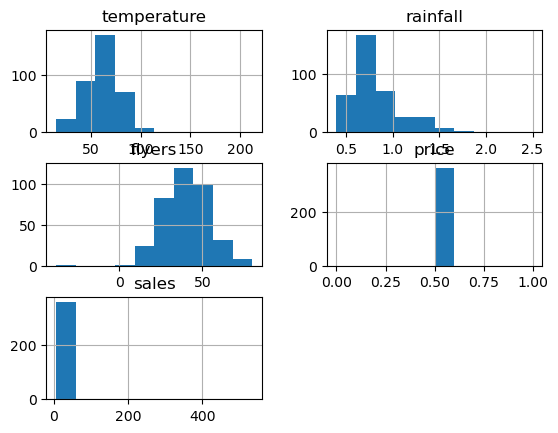

In [14]:
df.hist()
plt.show()

- temperature and sales are relatively normal. Rainfall is somewhat normal but has a right skew.

#### Use a 2 sigma decision rule to isolate the outliers. Do these make sense? Should certain outliers be kept or removed?



In [15]:
# normalcy of underlying distribution is required to 
# remove outliers with the sigma method so had to check
# features for normalcy. In this case we have two normal
# features I will put in list norm_cols
norm_cols = ['temperature', 'sales']

# z is (a given feature - the mean of that feature) /
# the standard deviation of that feature. It represents
# the number of standard deviations that observation is
# away from the mean for the feature.


# two-sigma is defining the fence as two standard deviations
# away from the mean or z > 2.
# getting z > 2 for multiple columns
for col in norm_cols:
    print(f' For Column {col}')
    print(df[(((
    df[col] - df[col].mean()
)/ df[col].std()) > 2) | (((
    df[col] - df[col].mean()
)/ df[col].std()) < -2)].T)
    print('=============')

 For Column temperature
                  41       166      176       181      190      198       202  \
date          2/11/17  6/16/17  6/26/17    7/1/17  7/10/17  7/18/17   7/22/17   
day          Saturday   Friday   Monday  Saturday   Monday  Tuesday  Saturday   
temperature     212.0     99.3    102.6     102.9     98.0     99.3      99.6   
rainfall         0.91     0.47     0.47      0.47     0.49     0.47      0.47   
flyers             35       77       60        59       66       76        49   
price             0.5      0.5      0.5       0.5      0.5      0.5       0.5   
sales              21       41       42       143       40       41        42   

                  207      338       364  
date          7/27/17  12/5/17  12/31/17  
day          Thursday  Tuesday    Sunday  
temperature      97.9     22.0      15.1  
rainfall         0.47     1.82       2.5  
flyers             74       11         9  
price             0.5      0.5       0.5  
sales              43     

- temp of 212 should be removed. Makes sense

In [16]:
# getting z > 3 for multiple columns
for col in norm_cols:
    print(f' For Column {col}')
    print(df[(((
    df[col] - df[col].mean()
)/ df[col].std()) > 3) | (((
    df[col] - df[col].mean()
)/ df[col].std()) < -3)].T)
    print('=============')

 For Column temperature
                   41
date          2/11/17
day          Saturday
temperature     212.0
rainfall         0.91
flyers             35
price             0.5
sales              21
 For Column sales
                  181     182     183      184
date           7/1/17  7/2/17  7/3/17   7/4/17
day          Saturday  Sunday  Monday  Tuesday
temperature     102.9    93.4    81.5     84.2
rainfall         0.47    0.51    0.54     0.59
flyers             59      68      68       49
price             0.5     0.5     0.5      0.5
sales             143     158     235      534


- temp of 212 should be removed. Makes sense.

In [17]:
num_cols = [col for col in df if pd.api.types.is_numeric_dtype(df[col])]
num_cols

['temperature', 'rainfall', 'flyers', 'price', 'sales']

In [18]:
num_cols2 = [col for col in df if df[col].dtype != 'O']
num_cols2

['temperature', 'rainfall', 'flyers', 'price', 'sales']

In [19]:
df.rainfall.sum()

301.48

In [20]:
df.temperature.mean()

61.22465753424662

In [21]:
df.shape

(365, 7)

In [22]:
df.date = pd.to_datetime(df['date'])

In [23]:
df = df.set_index('date').reset_index()

<AxesSubplot:xlabel='date'>

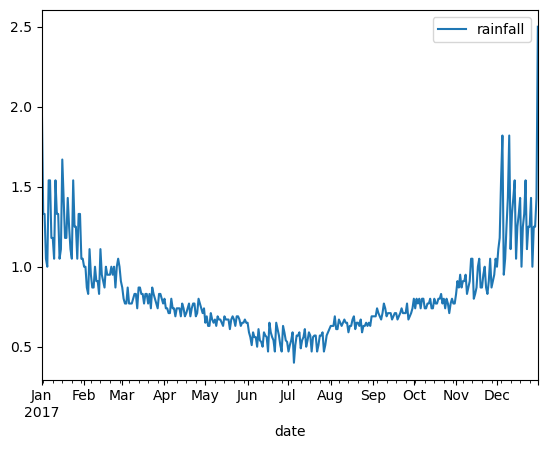

In [25]:
df.plot(y='rainfall', x='date')

<AxesSubplot:xlabel='date'>

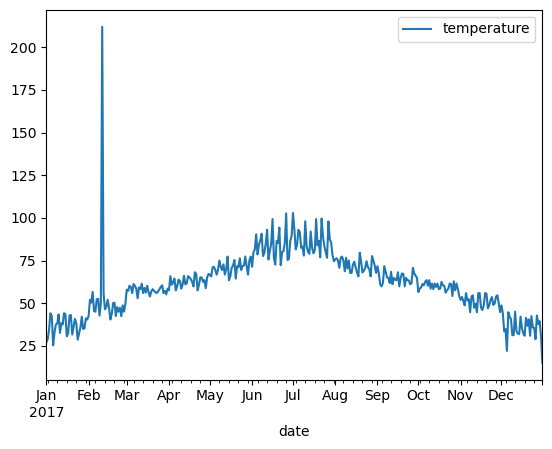

In [27]:
df.plot(x='date', y='temperature')